In [ ]:

# Reema Aldanish
#------------------#

# Dataset Origin:

https://www.kaggle.com/datasets/sbhatti/financial-sentiment-analysis

# Data Loading and Characteristics:

In [ ]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
from numpy import asarray, zeros
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split
from collections import Counter
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
text = pd.read_csv('data.csv')

In [ ]:
print(text.shape)

(5842, 2)


In [ ]:
print(text.shape)
text.head(10)

(5842, 2)


,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
5,$SPY wouldn't be surprised to see a green close,positive
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative
8,Kone 's net sales rose by some 14 % year-on-ye...,positive
9,The Stockmann department store will have a tot...,neutral


In [ ]:
text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [ ]:
text['Sentiment'].value_counts()

Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64

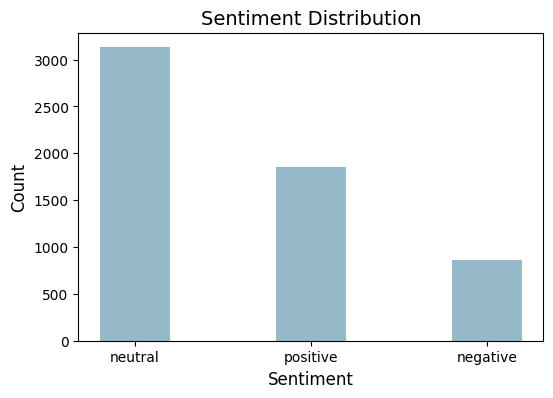

In [ ]:
sentiment_counts = {
    'neutral': 3130,
    'positive': 1852,
    'negative': 860
}
sentiments = list(sentiment_counts.keys())
counts = list(sentiment_counts.values())
plt.figure(figsize=(6, 4))
plt.bar(sentiments, counts, color=['#95B9C7', '#95B9C7', '#95B9C7'], width=0.4)
plt.title('Sentiment Distribution', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()



---



# Text Preprocessing:

In [ ]:
#Check for missing values in the dataset
text = pd.read_csv('data.csv')
missing_values = text.isnull().sum()
missing_percentage = (missing_values / len(text)) * 100
print("Percentage of missing values per column:")
print(missing_percentage)

Percentage of missing values per column:
Sentence     0.0
Sentiment    0.0
dtype: float64


In [ ]:
def preprocess_text(text):
    text = re.sub('<[^>]*>', '', text)
    print("Text after removing HTML tags:", text)
    #Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    print("Text after removing non-alphabetic characters and converting to lowercase:", text)
    #Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    print("Text after removing punctuation:", text)
    #Tokenize the text
    words = word_tokenize(text)
    print("Text after tokenization:", words)
    #Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    print("Text after removing stop words:", words)
    #Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    print("Text after Lemmatization:", words)
    preprocessed_text = ' '.join(words)
    stemmer = PorterStemmer()
    print("Final pre-processed text:", preprocessed_text)
    return preprocessed_text
text['preprocessed_Sentence']=text['Sentiment'].apply(preprocess_text)

Streaming output truncated to the last 5000 lines.
Text after Lemmatization: ['negative']
Final pre-processed text: negative
Text after removing HTML tags: negative
Text after removing non-alphabetic characters and converting to lowercase: negative
Text after removing punctuation: negative
Text after tokenization: ['negative']
Text after removing stop words: ['negative']
Text after Lemmatization: ['negative']
Final pre-processed text: negative
Text after removing HTML tags: negative
Text after removing non-alphabetic characters and converting to lowercase: negative
Text after removing punctuation: negative
Text after tokenization: ['negative']
Text after removing stop words: ['negative']
Text after Lemmatization: ['negative']
Final pre-processed text: negative
Text after removing HTML tags: neutral
Text after removing non-alphabetic characters and converting to lowercase: neutral
Text after removing punctuation: neutral
Text after tokenization: ['neutral']
Text after removing stop word

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
text = pd.read_csv('data.csv')
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)
#Apply the preprocessing function to the 'Sentence' column
text['Cleaned_Sentence'] = text['Sentence'].apply(preprocess_text)
#Display the first few rows of the updated dataset
print(text.head())
#Save the preprocessed data to a new CSV file
text.to_csv('preprocessed_data.csv', index=False)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                            Sentence Sentiment  \
0  The GeoSolutions technology will leverage Bene...  positive   
1  $ESI on lows, down $1.50 to $2.50 BK a real po...  negative   
2  For the last quarter of 2010 , Componenta 's n...  positive   
3  According to the Finnish-Russian Chamber of Co...   neutral   
4  The Swedish buyout firm has sold its remaining...   neutral   

                                    Cleaned_Sentence  
0  geosolutions technology leverage benefon gps s...  
1                       esi lows bk real possibility  
2  last quarter componenta net sales doubled eurm...  
3  according finnishrussian chamber commerce majo...  
4  swedish buyout firm sold remaining percent sta...  


# Text Representation:

In [ ]:
#Initialize the CountVectorizer
vectorizer = CountVectorizer()
#Fit the model and transform the input text to a BoW representation
X = vectorizer.fit_transform(text)
dense_X = X.toarray()
print("Vocabulary with IDs:")
print(vectorizer.vocabulary_)
#Print each sentence with its BoW vector representation
for i, sentence in enumerate(text):
    print(f"Sentence: '{sentence}'")
    print("BoW Representation:", dense_X[i])

Vocabulary with IDs:
{'sentence': 1, 'sentiment': 2, 'cleaned_sentence': 0}
Sentence: 'Sentence'
BoW Representation: [0 1 0]
Sentence: 'Sentiment'
BoW Representation: [0 0 1]
Sentence: 'Cleaned_Sentence'
BoW Representation: [1 0 0]


In [ ]:
#Initialize a CountVectorizer with binary=True to achieve one-hot encoding
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(text)
X_dense = X.toarray()
#Print the vocabulary and their corresponding IDs
print("Vocabulary with IDs:")
print(vectorizer.vocabulary_)
#Print one-hot encoded vectors for each sentence
print("\nOne-hot encoded vectors:")
for i, sentence in enumerate(text):
    print(f"Sentence {i+1}: {sentence}")
    print(f"One-hot encoded vector: {X_dense[i].tolist()}")

Vocabulary with IDs:
{'sentence': 1, 'sentiment': 2, 'cleaned_sentence': 0}

One-hot encoded vectors:
Sentence 1: Sentence
One-hot encoded vector: [0, 1, 0]
Sentence 2: Sentiment
One-hot encoded vector: [0, 0, 1]
Sentence 3: Cleaned_Sentence
One-hot encoded vector: [1, 0, 0]


In [ ]:
#Create an instance of TfidfVectorizer
TF_IDF_vectorizer = TfidfVectorizer()
TF_IDF_representation = TF_IDF_vectorizer.fit_transform(text)
print("TF-IDF Representation:")
print(TF_IDF_representation.toarray())

TF-IDF Representation:
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [ ]:
text = pd.read_csv('preprocessed_data.csv')
text['Cleaned_Sentence'] = text['Cleaned_Sentence'].fillna('')
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(text['Cleaned_Sentence'])
#Convert the TF-IDF matrix to a DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
#Display the first few rows of the TF-IDF DataFrame
print(tfidf_df.head())
tfidf_df.to_csv('tfidf_data.csv', index=False)

   aaland  aapl   ab  abb  abc  aberdeen  ability  able  abloy  abn  ...  \
0     0.0   0.0  0.0  0.0  0.0       0.0      0.0   0.0    0.0  0.0  ...   
1     0.0   0.0  0.0  0.0  0.0       0.0      0.0   0.0    0.0  0.0  ...   
2     0.0   0.0  0.0  0.0  0.0       0.0      0.0   0.0    0.0  0.0  ...   
3     0.0   0.0  0.0  0.0  0.0       0.0      0.0   0.0    0.0  0.0  ...   
4     0.0   0.0  0.0  0.0  0.0       0.0      0.0   0.0    0.0  0.0  ...   

   young  youtube   yy  zao  zinc  zinclead  znga  zoltan  zone   zs  
0    0.0      0.0  0.0  0.0   0.0       0.0   0.0     0.0   0.0  0.0  
1    0.0      0.0  0.0  0.0   0.0       0.0   0.0     0.0   0.0  0.0  
2    0.0      0.0  0.0  0.0   0.0       0.0   0.0     0.0   0.0  0.0  
3    0.0      0.0  0.0  0.0   0.0       0.0   0.0     0.0   0.0  0.0  
4    0.0      0.0  0.0  0.0   0.0       0.0   0.0     0.0   0.0  0.0  

[5 rows x 5000 columns]


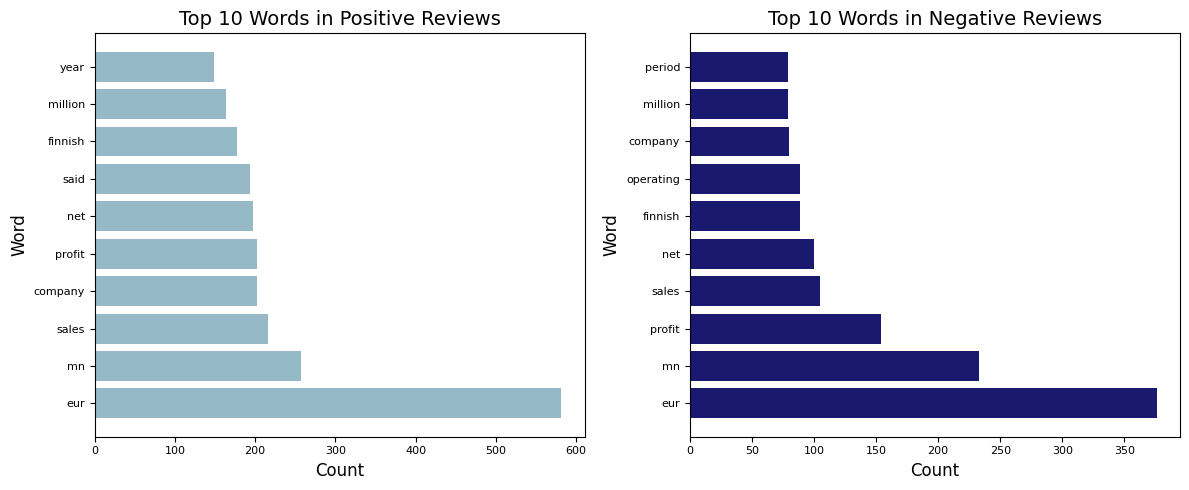

In [ ]:
text = pd.read_csv('preprocessed_data.csv')
text['Cleaned_Sentence'] = text['Cleaned_Sentence'].fillna('').astype(str)
#Separate positive and negative reviews
positive_reviews = text[text['Sentiment'] == 'positive']['Cleaned_Sentence']
negative_reviews = text[text['Sentiment'] == 'negative']['Cleaned_Sentence']
#Get the most common words in positive reviews
positive_words = ' '.join(positive_reviews).split()
positive_word_counts = Counter(positive_words)
positive_common_words = positive_word_counts.most_common(10)
#Get the most common words in negative reviews
negative_words = ' '.join(negative_reviews).split()
negative_word_counts = Counter(negative_words)
negative_common_words = negative_word_counts.most_common(10)
#Plot the most common words in positive reviews
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.barh([word[0] for word in positive_common_words], [word[1] for word in positive_common_words], color='#95B9C7')
plt.title('Top 10 Words in Positive Reviews', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Word', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
#Plot the most common words in negative reviews
plt.subplot(1, 2, 2)
plt.barh([word[0] for word in negative_common_words], [word[1] for word in negative_common_words], color='#191970')
plt.title('Top 10 Words in Negative Reviews', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Word', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()



---



# Modeling:

In [ ]:
#Split the data into training and test sets
text = pd.read_csv('preprocessed_data.csv')
text['Cleaned_Sentence'] = text['Cleaned_Sentence'].fillna('').astype(str)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(text['Cleaned_Sentence'])
y = text['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Applying the K-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Model: K-Nearest Neighbors")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Model: K-Nearest Neighbors
Accuracy: 0.5962360992301112
Classification Report:
              precision    recall  f1-score   support

    negative       0.37      0.17      0.23       175
     neutral       0.60      0.92      0.73       622
    positive       0.72      0.25      0.37       372

    accuracy                           0.60      1169
   macro avg       0.56      0.45      0.44      1169
weighted avg       0.60      0.60      0.54      1169



In [ ]:
#Applying the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Model: Decision Tree")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Model: Decision Tree
Accuracy: 0.613344739093242
Classification Report:
              precision    recall  f1-score   support

    negative       0.23      0.25      0.24       175
     neutral       0.69      0.70      0.70       622
    positive       0.68      0.64      0.66       372

    accuracy                           0.61      1169
   macro avg       0.53      0.53      0.53      1169
weighted avg       0.62      0.61      0.62      1169



In [ ]:
#Applying the ANN model (Artificial Neural Network)
#Initialize the ANN model with one hidden layer of 100 neurons, maximum 300 iterations, and a random state
ann_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
ann_model.fit(X_train, y_train)
y_pred = ann_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Model: Artificial Neural Network (ANN)")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Model: Artificial Neural Network (ANN)
Accuracy: 0.6458511548331908
Classification Report:
              precision    recall  f1-score   support

    negative       0.27      0.24      0.26       175
     neutral       0.70      0.74      0.72       622
    positive       0.70      0.67      0.69       372

    accuracy                           0.65      1169
   macro avg       0.56      0.55      0.56      1169
weighted avg       0.64      0.65      0.64      1169



In [ ]:
#Applying the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Model: Naive Bayes")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Model: Naive Bayes
Accuracy: 0.6946107784431138
Classification Report:
              precision    recall  f1-score   support

    negative       0.64      0.08      0.14       175
     neutral       0.68      0.95      0.79       622
    positive       0.73      0.56      0.64       372

    accuracy                           0.69      1169
   macro avg       0.68      0.53      0.52      1169
weighted avg       0.69      0.69      0.65      1169



In [ ]:
#Applying the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Model: Logistic Regression")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Model: Logistic Regression
Accuracy: 0.69803250641574
Classification Report:
              precision    recall  f1-score   support

    negative       0.44      0.15      0.22       175
     neutral       0.69      0.90      0.78       622
    positive       0.77      0.63      0.69       372

    accuracy                           0.70      1169
   macro avg       0.63      0.56      0.56      1169
weighted avg       0.68      0.70      0.67      1169



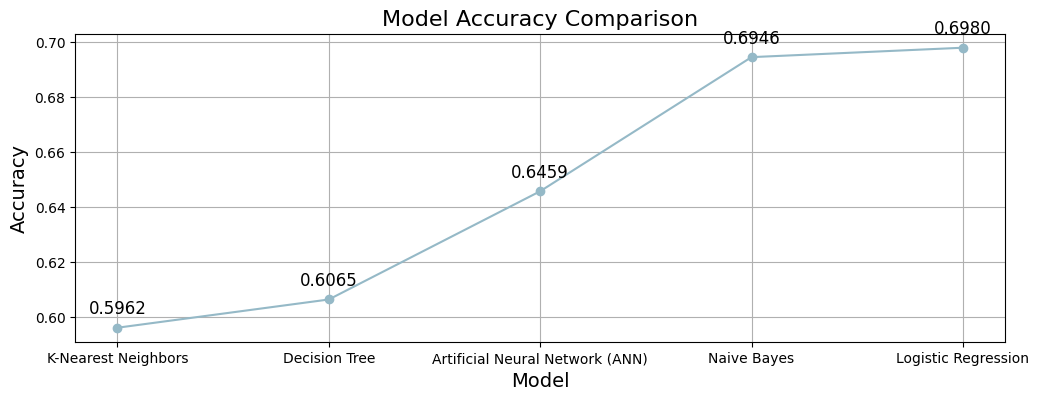

In [ ]:
models = ["K-Nearest Neighbors", "Decision Tree", "Artificial Neural Network (ANN)", "Naive Bayes", "Logistic Regression"]
accuracies = [0.5962360992301112, 0.6065012831479898, 0.6458511548331908, 0.6946107784431138, 0.69803250641574]
plt.figure(figsize=(12, 4))
plt.plot(models, accuracies, marker='o', linestyle='-', color='#95B9C7')
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Model Accuracy Comparison', fontsize=16)
for i, txt in enumerate(accuracies):
    plt.annotate(f"{txt:.4f}", (models[i], accuracies[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12)
plt.grid(True)
plt.show()


The chart shows a comparison of the accuracy of five models for financial sentiment classification. The logistic regression model achieves the highest accuracy at 0.6980, followed by the Naive Bayes model at 0.6946. Other models, such as the artificial neural network, decision tree, and k-nearest neighbors, show lower accuracy, with the k-nearest neighbors model having the lowest accuracy at 0.5962. This comparison indicates that the logistic regression model is the most effective for financial sentiment classification.



---



# Evaluation:

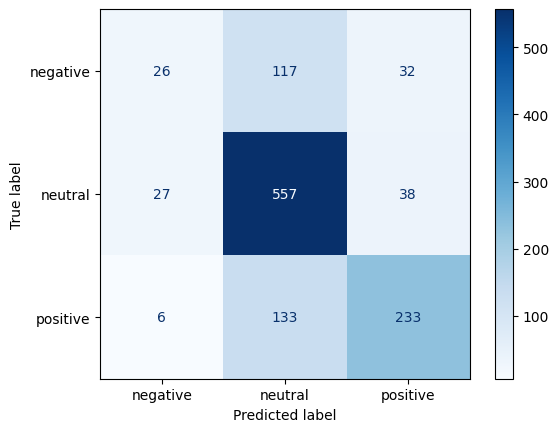

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text)
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=logistic_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


The confusion matrix shows the model's performance in classifying financial sentiments. It correctly classified 557 neutral comments but misclassified many negative and positive comments as neutral. Specifically, it correctly identified 26 negative and 233 positive comments. The model struggles with distinguishing between negative and positive sentiments.



---

